# Graham scan algorithm

## Basic graham scan algorithm implementation

In [1]:
import math

def find_bottom_most(inputSet):
    target_point = inputSet[0]

    for i in range(1,len(inputSet)):
        if inputSet[i][1] < target_point[1]:
            target_point = inputSet[i]
        elif inputSet[i][1]== target_point[1] and inputSet[i][0] < target_point[0]:
            target_point = inputSet[i]

    return target_point

def polar_angle(p1,p2):

    if p1==p2: return 0
    return (p2[0]-p1[0])/math.sqrt(distance(p1,p2))

def distance(p1,p2):

    return (p2[0]-p1[0])**2 + (p2[1]-p1[1])**2

def cross_product(p1,p2,p3):

    y1 = p1[1] - p2[1]
    y2 = p1[1] - p3[1]
    x1 = p1[0] - p2[0]
    x2 = p1[0] - p3[0]

    return y2 * x1 - y1 * x2

def merge(arr1,arr2,start): 
    res = []
    n1 = len(arr1)
    n2 = len(arr2)
  
    i = 0     
    j = 0      
  
    while i < n1 and j < n2 : 
        v1 = polar_angle(start,arr1[i])
        v2 = polar_angle(start,arr2[j])
        if v1 > v2:
            res.append(arr1[i]) 
            i += 1
        elif v1 < v2: 
            res.append(arr2[j]) 
            j += 1
        #when polar angle is the same
        #put the furthest point first if polar angle is greater than 0, vice versa
        elif (v1 > 0 and distance(start,arr1[i]) > distance(start,arr2[j])) or (v1 <= 0 and distance(start,arr1[i]) < distance(start,arr2[j])):
            res.append(arr1[i]) 
            i += 1
        else:
            res.append(arr2[j]) 
            j += 1
    while i < n1: 
        res.append(arr1[i]) 
        i += 1
  
    while j < n2: 
        res.append(arr2[j]) 
        j += 1
    
    return res

def merge_sort(arr,start): 
    if len(arr)==1: return arr

    mid = len(arr)//2
    left = arr[:mid]
    right = arr[mid:]

    return merge(merge_sort(left,start),merge_sort(right,start),start)

def grahamscan(inputSet):

    inputSet_copy = [i for i in inputSet]
    start = find_bottom_most(inputSet_copy)
    inputSet_copy.remove(start)
        
    sortedSet = merge_sort(inputSet_copy,start)
    outputSet = [start,sortedSet[0]]
    

    for point in sortedSet:
        while (len(outputSet)>=2 and cross_product(outputSet[-2],outputSet[-1],point) <= 0) :
            outputSet.pop()
        outputSet.append(point)

    return outputSet

## data points generation

In [2]:
from random import *

MAXX = 32767
MAXY = 32767
MINX = 0
MINY = 0
MIDDLE = [(MAXX-MINX)/2, (MAXY-MINY)/2]
NS = [100, 500, 1000, 5000, 10000, 15000, 20000]

def generate_random(N):
    points = []
    for p in range(N):
        while True:
            x = randint(MINX, MAXX)
            y = randint(MINY, MAXY)
            point = [x,y]
            if point not in points:
                break
        points.append(point)
        
    return points

def generate_worst(N):
    points = [[1,1],[30000,1],[15000,30000]]
    while len(points)<=N:
        x=randint(1,30000)
        y=randint(1,30000)
        point = [x,y]
        if cross_product([1,1],point,[30000,1])<0 and cross_product([30000,1],point,[15000,30000])<0 and cross_product([15000,30000],point,[1,1])<0 and point not in points:
            points.append(point)
        
    return points


## Timer function

In [3]:
import timeit

def timer_random():
    times = []
    stmt_code = "[grahamscan(inputSets_random[n]) for n in range(7)]"
    setup_code = '''
from __main__ import grahamscan
from __main__ import inputSets_random
    '''
    
    for n in range(7):
        time = timeit.timeit(lambda: grahamscan(inputSets_random[n]),setup = setup_code, number = 5)
        times.append(time/5)
    return times

def timer_worst():
    times = []
    stmt_code = "[grahamscan(inputSets_worst[n]) for n in range(7)]"
    setup_code = '''
from __main__ import grahamscan
from __main__ import inputSets_worst
    '''
    
    for n in range(7):
        time = timeit.timeit(lambda: grahamscan(inputSets_worst[n]),setup = setup_code, number = 5)
        times.append(time/5)
    return times

## Plot function

In [4]:
import matplotlib.pyplot as plt

def plot(times):
    NS = [100,500,1000,5000,10000,15000,20000]
    fig = plt.figure()
    graph = fig.add_subplot(111)
    graph.set(title='analysis graph', ylabel='Time', xlabel='Number of points')
    graph.plot(NS,times)
    plt.show()

## Test code for random case

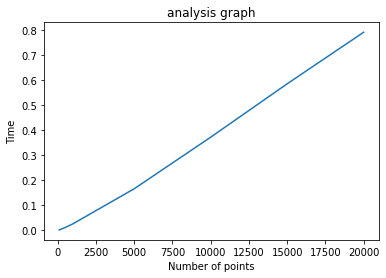

In [5]:
#generate random datatSet 
inputSets_random = [generate_random(NS[n]) for n in range(7)]

#plot of the previously computed execution times
times = timer_random()
plot(times)

## Test code for worst case

In [ ]:
#generate worst-case datatSet 
inputSets_worst = [generate_worst(NS[n]) for n in range(7)]

#plot of the previously computed execution times
times = timer_worst()
plot(times)

In [ ]:
import matplotlib.pyplot as plt

# inputSet and outputSet should have been defined above. 
# uncomment the next two lines only if you wish to test the plotting code before coding your algorithm

#inputSet = [[1,1], [2,2] , [3, 3], [4,4], [1,4], [3,1], [1, 5], [2, 4], [3, 5]]
#outputSet = [[1,1], [3,1] , [4, 4], [3,5], [1,5]]

plt.figure()

#first do a scatter plot of the inputSet
input_xs, input_ys = zip(*inputSet)
plt.scatter(input_xs, input_ys)

#then do a polygon plot of the computed covex hull
outputSet.append(outputSet[0]) #first create a 'closed loop' by adding the first point at the end of the list
output_xs, output_ys = zip(*outputSet) 
plt.plot(output_xs, output_ys) 

plt.show() 